In [1]:
import networkx as nx
import Function_GST as f
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np

In [2]:
path = "/home/rida/GST/GST/Graphes Spasio-Temporelles/GST_Grabels.graphml.xml"

In [3]:
GST = nx.read_graphml(path)

In [45]:
edges = [
    {'edge_type': data.get('relation'),'edge_score': float(data.get('Score'))} for u, v, data in GST.edges(data=True)
]

In [46]:
edges

[{'edge_type': 'Adjacence', 'edge_score': 1.0},
 {'edge_type': 'Adjacence', 'edge_score': 1.0},
 {'edge_type': 'Adjacence', 'edge_score': 1.0},
 {'edge_type': 'Adjacence', 'edge_score': 1.0},
 {'edge_type': 'Continuation', 'edge_score': 1.0},
 {'edge_type': 'Dérivation', 'edge_score': 0.5217650883978248},
 {'edge_type': 'Dérivation', 'edge_score': 0.6028177651044999},
 {'edge_type': 'Dérivation', 'edge_score': 0.6851540338236938},
 {'edge_type': 'Dérivation', 'edge_score': 0.775554579613741},
 {'edge_type': 'Dérivation', 'edge_score': 0.4617099611666269},
 {'edge_type': 'Dérivation', 'edge_score': 0.7150786787797285},
 {'edge_type': 'Dérivation', 'edge_score': 0.4593262232197779},
 {'edge_type': 'Dérivation', 'edge_score': 0.5874965840592629},
 {'edge_type': 'Dérivation', 'edge_score': 0.6543787779157066},
 {'edge_type': 'Dérivation', 'edge_score': 0.6177606154907982},
 {'edge_type': 'Dérivation', 'edge_score': 0.7057348029110883},
 {'edge_type': 'Adjacence', 'edge_score': 1.0},
 {'edg

In [47]:
df_edges = pd.DataFrame(edges)

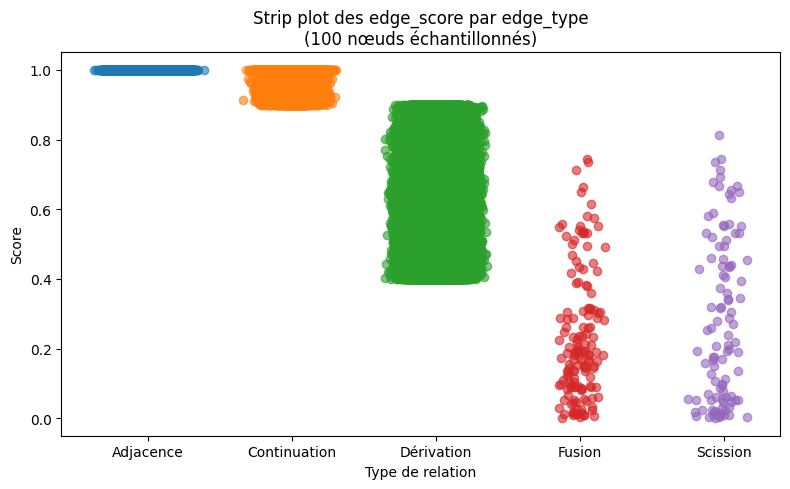

In [53]:
groups = df_edges.groupby('edge_type')['edge_score'].apply(list)
labels = groups.index.tolist()

plt.figure(figsize=(8,5))
for i, label in enumerate(labels, start=1):
    scores = groups[label]
    # ajouter un peu de bruit sur l'axe x pour « jitter »
    x = np.random.normal(loc=i, scale=0.08, size=len(scores))
    plt.scatter(x, scores, alpha=0.6)

plt.xticks(range(1, len(labels)+1), labels)
plt.title("Strip plot des edge_score par edge_type\n(100 nœuds échantillonnés)")
plt.xlabel("Type de relation")
plt.ylabel("Score")
plt.tight_layout()
plt.show()

In [ ]:
f.afficher_scores_par_relation_par_annee(GST)


Relation : Fusion
  280_2015/01_2015/01   Fusion   357_2015/05_2015/05   0.062004842558043616
  1721_2017/03_2017/03   Fusion   2189_2017/11_2017/11   0.539163757446212
  1782_2018/11_2018/11   Fusion   1785_2019/03_2019/03   0.4345565198215987
  617_2019/03_2019/03   Fusion   619_2020/03_2020/03   0.49543661529258765
  2185_2020/11_2020/11   Fusion   2167_2021/03_2021/03   0.49979590673583424
  358_2021/03_2021/03   Fusion   5939_2021/11_2021/11   0.014646162588026812
  8696_2022/06_2022/06   Fusion   10030_2023/09_2023/09   0.36060635775234434
  6085_2024/01_2024/01   Fusion   6832_2025/02_2025/02   0.15525209310600532

Relation : Continuation
  0_2015/01_2015/01   Continuation   0_2015/05_2015/05   1.0
  0_2016/05_2016/05   Continuation   0_2016/11_2016/11   1.0
  0_2017/03_2017/03   Continuation   2_2017/11_2017/11   0.9442795894860676
  0_2018/11_2018/11   Continuation   0_2019/03_2019/03   1.0
  0_2019/03_2019/03   Continuation   0_2020/03_2020/03   1.0
  6_2020/03_2020/03   Con

In [5]:
f.afficher_years_uniques(GST)

Années (year) disponibles dans le graphe : ['2015/01', '2015/05', '2016/05', '2016/11', '2017/03', '2017/11', '2018/11', '2019/03', '2020/03', '2020/11', '2021/03', '2021/11', '2022/06', '2023/09', '2024/01', '2025/02']


In [4]:
f.afficher_statistiques_gst(GST)

--- Statistiques du Graphe Spatio-Temporel ---
Nombre total d'entités (nœuds): 118647
Nombre total de relations (arêtes): 1135516

Répartition des types de relations:
  - Adjacence: 341880 relations
  - Continuation: 44895 relations
  - Dérivation: 748493 relations
  - Fusion: 146 relations
  - Scission: 102 relations

Statistiques sur les attributs des entités:
  - Répartition par 'classe':
    - 4.0: 34777 entités
    - 3.0: 7794 entités
    - 2.0: 13414 entités
    - 5.0: 31415 entités
    - 7.0: 3858 entités
    - 0.0: 26793 entités
    - 1.0: 448 entités
    - 6.0: 148 entités
  - Attribut 'Aire':
    - Moyenne: 5883.63
    - Max: 2036560.62
  - Attribut 'Perimeter':
    - Moyenne: 1000.44
    - Max: 46220.36
  - Attribut 'Largeur':
    - Moyenne: 118.10
    - Max: 3442.00
  - Attribut 'Hauteur':
    - Moyenne: 115.91
    - Max: 3442.00
  - Attribut 'Rectangularity':
    - Moyenne: 252.45
    - Max: 8191.50
  - Attribut 'Elongation':
    - Moyenne: 1.60
    - Max: 27.75
  - Attrib